In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import re
import pandas as pd

from utils import read_list, normal_distribution, normalize, inverse_distances, normed_dists_to_sims

In [2]:
def get_scatter_plot(data_x, data_y, data_x1, data_y1):
    """ Scatter plot of novelties vs diversities. 
    """
    plt.scatter(data_y, data_x, color='red', marker='+', label='Synthetic', alpha=1)
    plt.scatter(data_y1, data_x1, color='blue', marker='o', label='Real', alpha=0.1)

    plt.title('{} vs {} of real and fake sentences'.format("Diversities", "Novelties"))
    plt.xlabel('Novelty of sentence')
    plt.ylabel('Diversity of sentence')
    plt.legend(loc='upper left')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()


# Metrics for novelty and diversity

- Jaccard similarity metric
- Levenshtein distance metric - Transformed to similarity
- Word Mover's Distance metric - Transformed to similarity

## Jaccard similarity metric

Jaccard similarity does not need to normalised like the other metrics seen later

In [3]:
# # # Initial jaccard similarities
# jac_real_diversities = read_list('analysis_jaccard/jaccard_diversities_real.txt')
# jac_real_novelties = read_list('analysis_jaccard/jaccard_novelties_real.txt')

# jac_fake_diversities = read_list('analysis_jaccard/jaccard_diversities_fake3.txt')
# jac_fake_novelties = read_list('analysis_jaccard/jaccard_novelties_fake3.txt')

# # jac_fake_diversities = read_list('extra/jaccard_diversities_fake2.txt')
# # jac_fake_novelties = read_list('extra/jaccard_novelties_fake2_10.txt')

# # Transform distances to similarities
# jac_real_diversities = normed_dists_to_sims(normalize(jac_real_diversities))
# jac_real_novelties = normed_dists_to_sims(normalize(jac_real_novelties))
# jac_fake_diversities = normed_dists_to_sims(normalize(jac_fake_diversities))
# jac_fake_novelties = normed_dists_to_sims(normalize(jac_fake_novelties))

# assert(len(jac_real_diversities) == len(jac_real_novelties))
# assert(len(jac_fake_diversities) == len(jac_fake_diversities))


METRIC = "jaccard"

labelled_real=f'analysis_jaccard/{METRIC}_labelled_real_text.csv'
labelled_fake=f'analysis_jaccard/{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

jac_real_diversities = real_data['diversity'].values
jac_real_novelties = real_data['novelty'].values
jac_fake_diversities = fake_data['diversity'].values
jac_fake_novelties = fake_data['novelty'].values

jac_real_diversities = real_data['diversity'].values
jac_real_novelties = real_data['novelty'].values
jac_fake_diversities = fake_data['diversity'].values
jac_fake_novelties = fake_data['novelty'].values

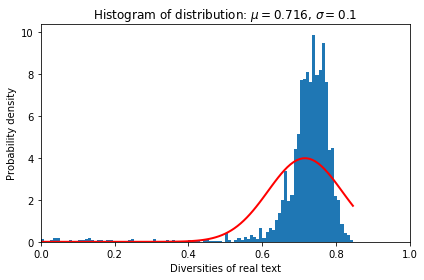

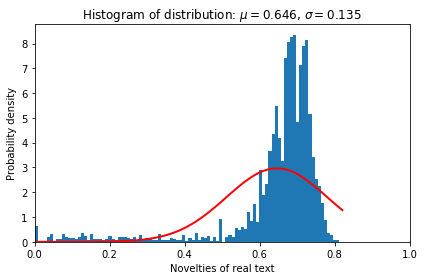

In [4]:
normal_distribution(jac_real_diversities, 'Diversities of real text')
normal_distribution(jac_real_novelties, 'Novelties of real text')

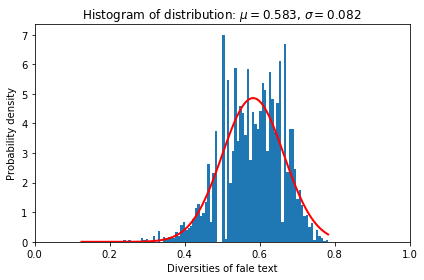

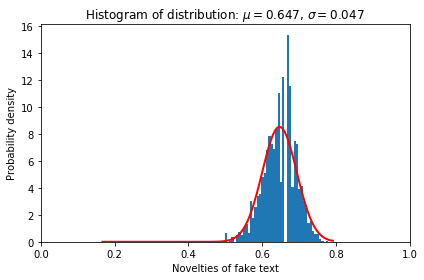

In [5]:
normal_distribution(jac_fake_diversities, 'Diversities of fale text')
normal_distribution(jac_fake_novelties, 'Novelties of fake text')

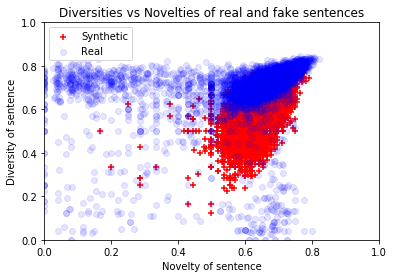

In [6]:
get_scatter_plot(jac_fake_diversities, jac_fake_novelties, jac_real_diversities, jac_real_novelties)

## Levenshtein distance metric

Levenshtein distance needs to normalised

In [7]:
# # Read the metrics results from the file
# lev_real_diversities_distances = read_list('analysis_levenshtein/levenshtein_diversities_real.txt')
# lev_real_novelties_distances = read_list('analysis_levenshtein/levenshtein_novelties_real.txt')
# lev_fake_diversities_distances = read_list('analysis_levenshtein/levenshtein_diversities_fake2.txt')
# lev_fake_novelties_distances = read_list('analysis_levenshtein/levenshtein_novelties_fake2.txt')

# def normed_dists_to_simss(dists):
#     return [1 - dist for dist in dists]

# def scale(dists):
#     return [dist/max(dists) for dist in dists]


# # Transform distances to similarities
# lev_normed_real_diversities = scale(lev_real_diversities_distances)
# lev_normed_real_novelties = scale(lev_real_novelties_distances)
# lev_normed_fake_diversities = scale(normed_dists_to_simss(lev_fake_diversities_distances))
# lev_normed_fake_novelties = scale(normed_dists_to_simss(lev_fake_novelties_distances))


# lev_normed_real_diversities = read_list('analysis_levenshtein/levenshtein_diversities_real.txt')
# lev_normed_real_novelties = read_list('analysis_levenshtein/levenshtein_novelties_real.txt')
# lev_normed_fake_diversities = read_list('analysis_levenshtein/levenshtein_diversities_fake2.txt')
# lev_normed_fake_novelties = read_list('analysis_levenshtein/levenshtein_novelties_fake2.txt')


# def re_normalize(dists):
# #     max_dist = max(dists)
# #     return [dist/max_dist for dist in dists]
#     return dists

# # # 
# Transform distances to similarities
# lev_normed_real_diversities = re_normalize(lev_real_diversities_distances)
# lev_normed_real_novelties = re_normalize(lev_real_novelties_distances)
# lev_normed_fake_diversities = re_normalize(normed_dists_to_simss(lev_fake_diversities_distances))
# lev_normed_fake_novelties = re_normalize(normed_dists_to_simss(lev_fake_novelties_distances))


METRIC = "levenshtein"

labelled_real=f'analysis_levenshtein/{METRIC}_labelled_real_text.csv'
labelled_fake=f'analysis_levenshtein/{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

def fix(dists):
    return [5*dist for dist in dists]


lev_normed_real_diversities = (real_data['diversity'].values)
lev_normed_real_novelties = (real_data['novelty'].values)
lev_normed_fake_diversities = (fake_data['diversity'].values)
lev_normed_fake_novelties = (fake_data['novelty'].values)


lev_normed_real_diversities1 = fix(real_data['diversity'].values)
lev_normed_real_novelties1 = fix(real_data['novelty'].values)
lev_normed_fake_diversities1 = fix(fake_data['diversity'].values)
lev_normed_fake_novelties1 = fix(fake_data['novelty'].values)

In [8]:
lev_normed_real_diversities[:10]

lev_normed_real_diversities1[:10]

[0.564102565,
 0.603015075,
 0.55194805,
 0.5820105799999999,
 0.6136363650000001,
 0.645833335,
 0.56097561,
 0.564102565,
 0.5958549200000001,
 0.5897435900000001]

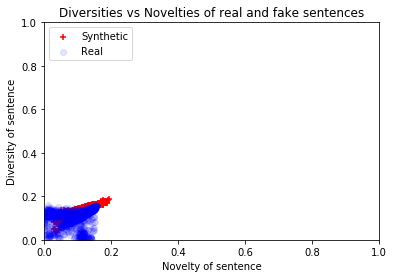

In [9]:
get_scatter_plot(lev_normed_fake_diversities, lev_normed_fake_novelties, lev_normed_real_diversities, lev_normed_real_novelties)

## Word Mover's Distance metric

Word Mover's Distance needs to normalised

In [10]:
# # Read the metrics results from the file
# wmd_real_diversities_distances = read_list('analysis_word_emb/wmd_diversities_real.txt')
# wmd_real_novelties_distances = read_list('analysis_word_emb/wmd_novelties_real.txt')
# wmd_fake_diversities_distances = read_list('analysis_word_emb/wmd_diversities_fake2.txt')
# wmd_fake_novelties_distances = read_list('analysis_word_emb/wmd_novelties_fake2.txt')


# # wmd_normed_real_diversities = read_list('analysis_word_emb/wmd_diversities_real.txt')
# # wmd_normed_real_novelties = read_list('analysis_word_emb/wmd_novelties_real.txt')
# # wmd_normed_fake_diversities = read_list('analysis_word_emb/wmd_diversities_fake2.txt')
# # wmd_normed_fake_novelties = read_list('analysis_word_emb/wmd_novelties_fake2.txt')

# # Transform distances to similarities
# wmd_normed_real_diversities = normed_dists_to_sims(normalize(wmd_real_diversities_distances))
# wmd_normed_real_novelties = normed_dists_to_sims(normalize(wmd_real_novelties_distances))
# wmd_normed_fake_diversities = normed_dists_to_sims(normalize(wmd_fake_diversities_distances))
# wmd_normed_fake_novelties = normed_dists_to_sims(normalize(wmd_fake_novelties_distances))

# print(max(wmd_normed_real_diversities))
# print(max(wmd_normed_real_novelties))
# print(max(wmd_normed_fake_diversities))
# print(max(wmd_normed_fake_novelties))

METRIC = "wmd"

labelled_real=f'analysis_word_emb/{METRIC}_labelled_real_text.csv'
labelled_fake=f'analysis_word_emb/{METRIC}_labelled_fake_text.csv'

real_data = pd.read_csv(labelled_real)
fake_data = pd.read_csv(labelled_fake)

real_data['text'] = real_data['text'].astype('str')
mask = (real_data['text'].str.len() >= 20)
real_data = real_data[mask]

fake_data['text'] = fake_data['text'].astype('str')
mask = (fake_data['text'].str.len() >= 20)
fake_data = fake_data[mask]

wmd_normed_real_diversities = real_data['diversity'].values
wmd_normed_real_novelties = real_data['novelty'].values
wmd_normed_fake_diversities = fake_data['diversity'].values
wmd_normed_fake_novelties = fake_data['novelty'].values

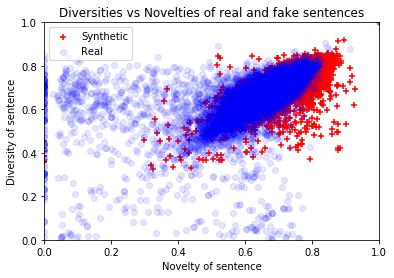

In [11]:
get_scatter_plot(wmd_normed_fake_diversities, wmd_normed_fake_novelties, wmd_normed_real_diversities, wmd_normed_real_novelties)

In [17]:
def stacked_hist(data, xlabel, ylabel):
    n_bins=100
    colors = ["Real", "Synthetic"]
    plt.hist(data, n_bins, density=1, histtype='barstacked', stacked=True, label=colors)
    plt.legend(loc="upper left")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
#     plt.title(name)
    plt.show()
    
def _stacked_hist(data):
    n_bins=1000
    colors = ["Real", "Fake"]
    plt.hist(data, n_bins, density=1, histtype='bar', stacked=True, label=colors)
    plt.legend(loc="upper left")
#     plt.title(name)
    plt.show()
    
def combine_metrics_list(list1, list2, list3):
    combined_list = [list1]
    combined_list.append(list2)
    combined_list.append(list3)
    
    return combined_list

def combine_real_fake(real_list, fake_list):
    combined_list = [real_list]
    combined_list.append(fake_list)
    return combined_list

## Jaccard Novelty and Diversity

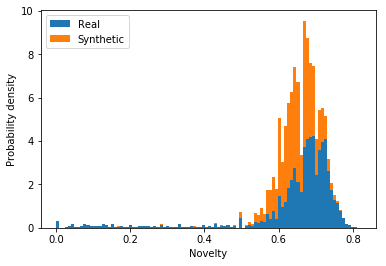

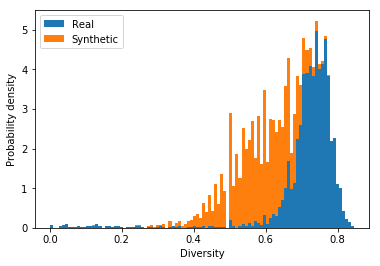

In [19]:
# Novelties of real and fake text using jaccard similarity metric
jac_novs = combine_real_fake(jac_real_novelties, jac_fake_novelties)
stacked_hist(jac_novs, "Novelty", "Probability density")

# Diversities of real and fake text using jaccard similarity metric
jac_divs = combine_real_fake(jac_real_diversities, jac_fake_diversities)
stacked_hist(jac_divs, "Diversity", "Probability density")

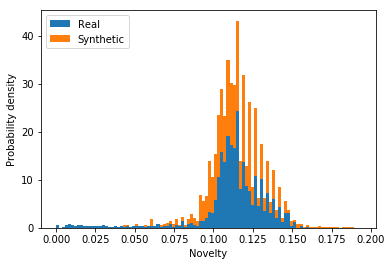

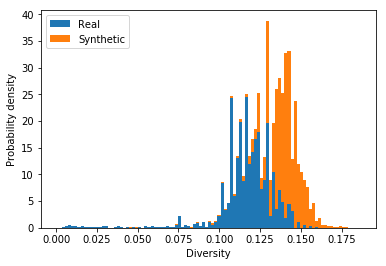

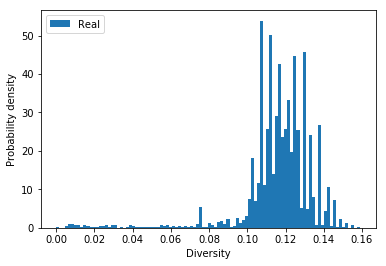

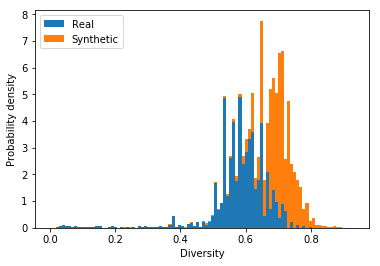

In [22]:
# Novelties of real and fake text using levenshtein metric
lev_novs = combine_real_fake(lev_normed_real_novelties, lev_normed_fake_novelties)
lev_novs1 = combine_real_fake(lev_normed_real_novelties1, lev_normed_fake_novelties1)

stacked_hist(lev_novs, "Novelty", "Probability density")

# Diversities of real and fake text using levenshtein metric
lev_divs = combine_real_fake(lev_normed_real_diversities, lev_normed_fake_diversities)
stacked_hist(lev_divs, "Diversity", "Probability density")

stacked_hist(lev_normed_real_diversities,  "Diversity", "Probability density")


# Diversities of real and fake text using levenshtein metric
lev_divs1 = combine_real_fake(lev_normed_real_diversities1, lev_normed_fake_diversities1)
stacked_hist(lev_divs1,  "Diversity", "Probability density")

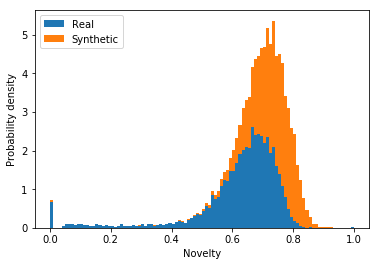

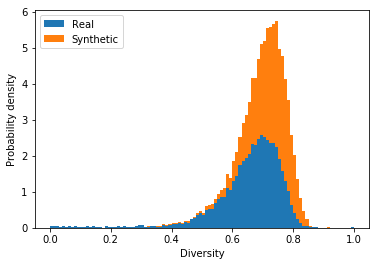

In [23]:
# Novelties of real and fake text using WMD metric
wmd_novs = combine_real_fake(wmd_normed_real_novelties, wmd_normed_fake_novelties)
stacked_hist(wmd_novs, "Novelty", "Probability density")

# Diversities of real and fake text using WMD metric
wmd_divs = combine_real_fake(wmd_normed_real_diversities, wmd_normed_fake_diversities)
stacked_hist(wmd_divs, "Diversity", "Probability density")

In [24]:
# combined_fake_novelties = [jac_fake_novelties]
# combined_fake_novelties.append(wmd_normed_fake_novelties)

# stacked_hist(combined_fake_novelties,  "Novelties of fake text")

In [25]:
# combined_fake_diversities = [jac_fake_diversities]
# combined_fake_diversities.append(wmd_normed_fake_diversities)

# stacked_hist(combined_fake_diversities, "Diversities of fake text")

/Users/dc/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


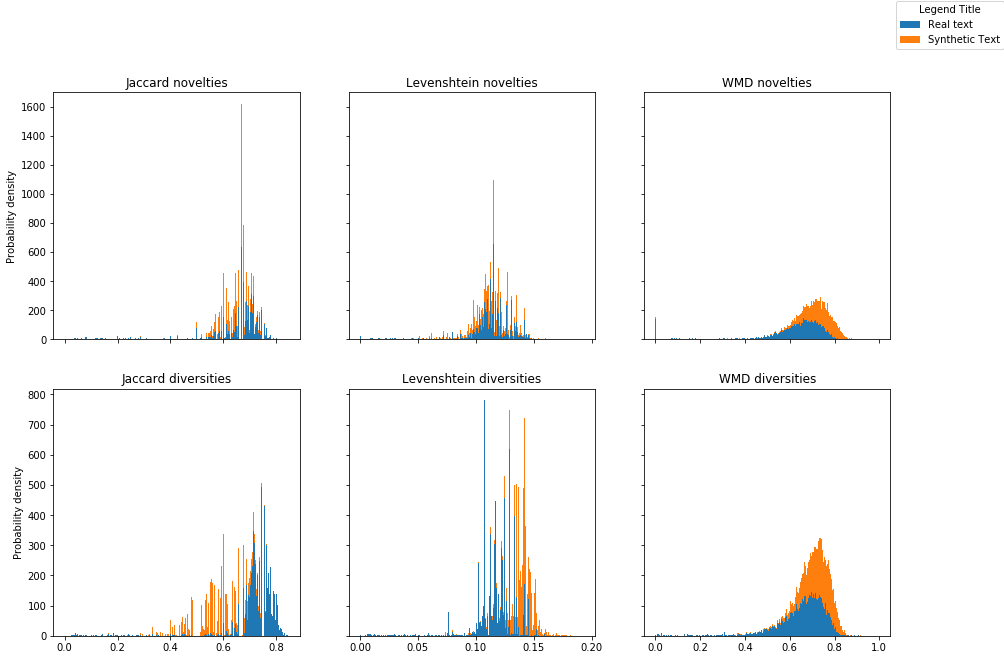

In [26]:
n_bins=400
colors = ["Real text", "Synthetic Text"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(2, 3, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, histtype='bar', stacked=True, label=colors)
axarr[0, 0].set_title('Jaccard novelties')
# axarr[0, 0].set_ylim(0,20)
p2 = axarr[0, 1].hist(lev_novs, n_bins, histtype='bar', stacked=True, label=colors)
axarr[0, 1].set_title('Levenshtein novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, histtype='bar', stacked=True, label=colors)
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, histtype='bar', stacked=True, label=colors)
axarr[1, 0].set_title('Jaccard diversities')
# axarr[1,0].set_ylim(0,20)
p5 = axarr[1, 1].hist(lev_divs, n_bins, histtype='bar', stacked=True, label=colors)
axarr[1, 1].set_title('Levenshtein diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, histtype='bar', stacked=True, label=colors)
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.1,    # Small spacing around legend box
           title="Legend Title"  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

/Users/dc/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


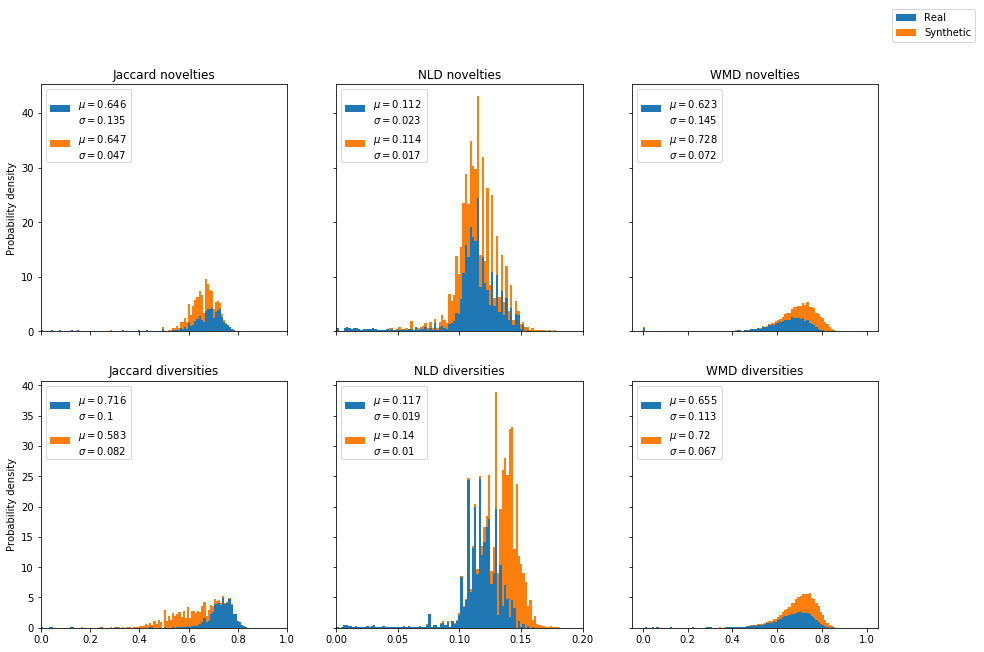

In [27]:
n_bins=100
colors = ["Real", "Synthetic"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(2, 3, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_novelties), 3), round(np.nanstd(jac_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_novelties), 3), round(np.nanstd(jac_fake_novelties), 3))])
axarr[0, 0].legend(loc="upper left")
axarr[0, 0].set_xlim(0,1)
axarr[0, 0].set_title('Jaccard novelties')
p2 = axarr[0, 1].hist(lev_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_real_novelties), 3), round(np.nanstd(lev_normed_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_fake_novelties), 3), round(np.nanstd(lev_normed_fake_novelties), 3))])
axarr[0, 1].legend(loc="upper left")
axarr[0, 1].set_xlim(0,0.2)
axarr[0, 1].set_xticks([0, 0.05, 0.10,0.15,0.2])
axarr[0, 1].set_title('NLD novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_real_novelties), 3), round(np.nanstd(wmd_normed_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_fake_novelties), 3), round(np.nanstd(wmd_normed_fake_novelties), 3))])
axarr[0, 2].legend(loc="upper left")
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_diversities), 3), round(np.nanstd(jac_real_diversities), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_diversities), 3), round(np.nanstd(jac_fake_diversities), 3))])
axarr[1, 0].legend(loc="upper left")
axarr[1, 0].set_title('Jaccard diversities')
p5 = axarr[1, 1].hist(lev_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_real_diversities), 3), round(np.nanstd(lev_normed_real_diversities), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_fake_diversities), 3), round(np.nanstd(lev_normed_fake_diversities), 3))])
axarr[1, 1].legend(loc="upper left")
axarr[1, 1].set_xlim(0,0.2)
axarr[1, 1].set_title('NLD diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_real_diversities), 3), round(np.nanstd(wmd_normed_real_diversities), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_fake_diversities), 3), round(np.nanstd(wmd_normed_fake_diversities), 3))])
axarr[1, 2].legend(loc="upper left")
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.9,    # Small spacing around legend box
           title=""  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()

/Users/dc/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:1357: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  warnings.warn("You have mixed positional and keyword "


[0.558375635,
 0.585585585,
 0.54347826,
 0.55263158,
 0.570776255,
 0.6308411199999999,
 0.55299539,
 0.564102565,
 0.563063065,
 0.57591623]

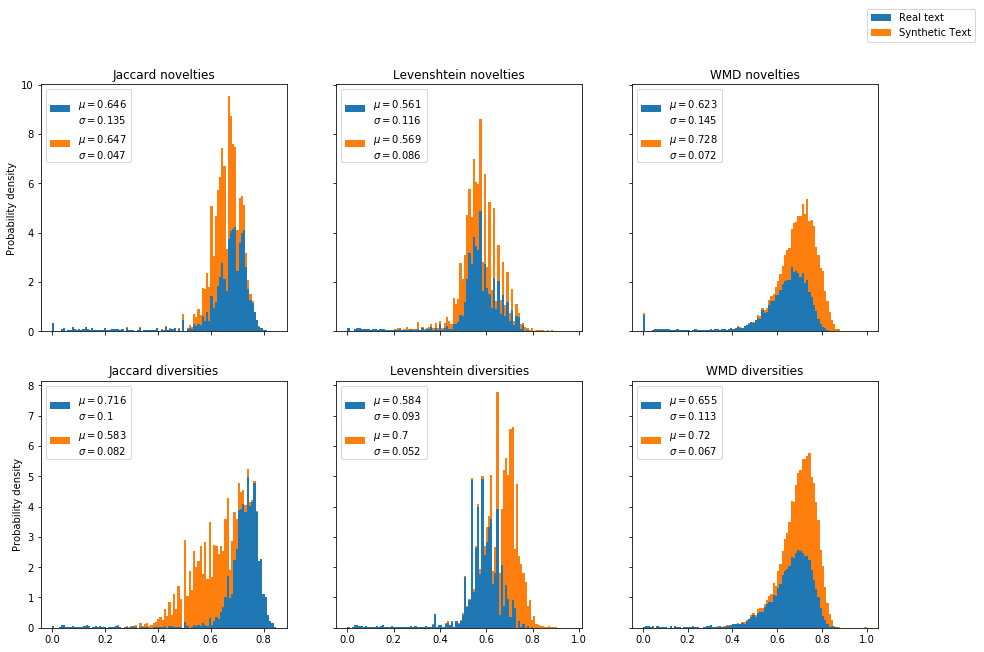

In [28]:
n_bins=100
colors = ["Real text", "Synthetic Text"]
# plt.hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=colors)
# plt.legend(loc="upper right")

fig, axarr = plt.subplots(2, 3, sharex='col', sharey='row')

p1 = axarr[0, 0].hist(jac_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_novelties), 3), round(np.nanstd(jac_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_novelties), 3), round(np.nanstd(jac_fake_novelties), 3))])
axarr[0, 0].legend(loc="upper left")
axarr[0, 0].set_title('Jaccard novelties')
p2 = axarr[0, 1].hist(lev_novs1, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_real_novelties1), 3), round(np.nanstd(lev_normed_real_novelties1), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_fake_novelties1), 3), round(np.nanstd(lev_normed_fake_novelties1), 3))])
axarr[0, 1].legend(loc="upper left")
axarr[0, 1].set_title('Levenshtein novelties')
p3 = axarr[0, 2].hist(wmd_novs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_real_novelties), 3), round(np.nanstd(wmd_normed_real_novelties), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_fake_novelties), 3), round(np.nanstd(wmd_normed_fake_novelties), 3))])
axarr[0, 2].legend(loc="upper left")
axarr[0, 2].set_title('WMD novelties')
p4 = axarr[1, 0].hist(jac_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_real_diversities), 3), round(np.nanstd(jac_real_diversities), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(jac_fake_diversities), 3), round(np.nanstd(jac_fake_diversities), 3))])
axarr[1, 0].legend(loc="upper left")
axarr[1, 0].set_title('Jaccard diversities')
p5 = axarr[1, 1].hist(lev_divs1, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_real_diversities1), 3), round(np.nanstd(lev_normed_real_diversities1), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(lev_normed_fake_diversities1), 3), round(np.nanstd(lev_normed_fake_diversities1), 3))])
axarr[1, 1].legend(loc="upper left")
axarr[1, 1].set_title('Levenshtein diversities')
p6 = axarr[1, 2].hist(wmd_divs, n_bins, density=1, histtype='bar', stacked=True, label=['$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_real_diversities), 3), round(np.nanstd(wmd_normed_real_diversities), 3)),'$\mu={}$ \n$\sigma={}$'.format(
        round(np.nanmean(wmd_normed_fake_diversities), 3), round(np.nanstd(wmd_normed_fake_diversities), 3))])
axarr[1, 2].legend(loc="upper left")
axarr[1, 2].set_title('WMD diversities')

line_labels = colors
fig.legend([p1, p6],     # The line objects
           labels=line_labels,   # The labels for each line
           loc="upper right",   # Position of legend
           borderaxespad=0.9,    # Small spacing around legend box
           title=""  # Title for the legend
           )

fig.set_figheight(10)
fig.set_figwidth(15)

for ax in axarr.flat:
    ax.set(ylabel='Probability density')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarr.flat:
    ax.label_outer()
    
lev_normed_real_novelties1[:10]

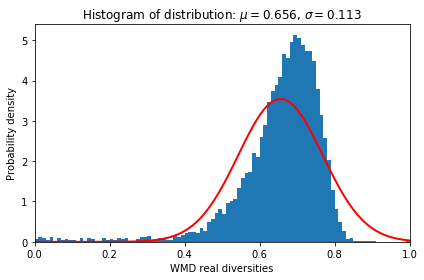

In [21]:
normal_distribution((wmd_normed_real_diversities), "WMD real diversities")

In [22]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from sklearn import datasets

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

In [23]:
iris = datasets.load_iris()
X, y = jac_novs, iris.target
    
clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)    

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)

## Box plots for different features

In [31]:
jac_Novelty_RF=[0.65188241,0.65031315,0.65197335,0.65545362,0.65828092,0.64904095,0.6513089,0.63948498,0.66002099,0.66666667]
jac_Novelty_Gaussian=[0.45169887,0.4576845,0.44610169,0.44939271,0.45836109,0.45554036,0.46603261,0.45602165,0.48189598,0.46216216]
jac_Diversity_RF=[0.87880251,0.88702516,0.88554801,0.88132296,0.88252715,0.87906751,0.88618677,0.88353808,0.86816406,0.89092664]
jac_Diversity_Gaussian=[0.85216615,0.86222628,0.85895118,0.85535155,0.85493406,0.86138614,0.85190157,0.86849315,0.84076433,0.88106904]
jac_Novelty_Diversity_RF=[0.91933174,0.92344961,0.9154659,0.92936088,0.91400966,0.92292963,0.92775665,0.91744016,0.91666667,0.92439372]
jac_Novelty_Diversity_Gaussian=[0.84126189,0.85017776,0.84084084,0.83685801,0.83358779,0.84638554,0.84464555,0.8373036,0.83841921,0.86040735]

lev_Novelty_RF=[0.87494232,0.85993485,0.87727485,0.8727948,0.87752229,0.87914139,0.8650904,0.86660534,0.86256363,0.86403712]
lev_Novelty_Gaussian=[0.2768595,0.26657163,0.24421965,0.26638478,0.24098124,0.24195804,0.28190743,0.27591036,0.30046948,0.24246671]
lev_Diversity_RF=[0.96472831,0.96958175,0.96079358,0.96798853,0.95866983,0.96190476,0.96900334,0.95454545,0.9640492,0.96866097]
lev_Diversity_Gaussian=[0.81832543,0.82801882,0.81918819,0.81803714,0.81035394,0.8129234,0.82870613,0.83606557,0.80967403,0.80761099]
lev_Novelty_Diversity_RF=[0.98646035,0.98660287,0.98707516,0.98893699,0.98318116,0.9841117,0.98843931,0.98803255,0.98120482,0.98559078]
lev_Novelty_Diversity_Gaussian=[0.80421053,0.8170347,0.80552604,0.80869104,0.80486515,0.80208877,0.81407563,0.82248829,0.79599367,0.79617834]

wmd_Novelty_RF=[0.61253133,0.63930468,0.63265306,0.63910506,0.58333333,0.6266137,0.62778052,0.62628236,0.63819578,0.59244533]
wmd_Novelty_Gaussian=[0.55465334,0.58385093,0.57089084,0.58554663,0.556804,0.57605985,0.57901235,0.5779703,0.55430712,0.52007648]
wmd_Diversity_RF=[0.6284585,0.64267613,0.64,0.63361428,0.62099556,0.64597478,0.63204748,0.63377416,0.63708873,0.62096774]
wmd_Diversity_Gaussian=[0.49145028,0.52834891,0.5152458,0.49839846,0.52319109,0.52578616,0.48911652,0.51576293,0.50189155,0.47433398]
wmd_Novelty_Diversity_RF=[0.65697091,0.67542579,0.65648855,0.64313725,0.64047737,0.66700201,0.64595008,0.6446365,0.64859335,0.6118863,]
wmd_Novelty_Diversity_Gaussian=[0.55931162,0.58616505,0.56791641,0.58312958,0.55779817,0.55895197,0.56527094,0.57581338,0.55679012,0.52644836]

Text(0.5,0.98,'Naive Bayes Classifier')

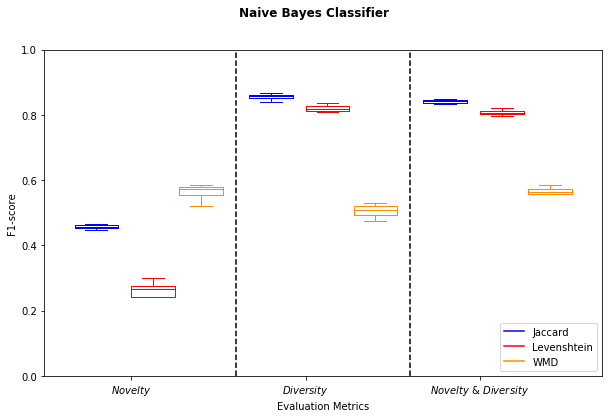

In [32]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [jac_Novelty_Gaussian, jac_Diversity_Gaussian, jac_Novelty_Diversity_Gaussian] # novelty
data_b = [lev_Novelty_Gaussian, lev_Diversity_Gaussian, lev_Novelty_Diversity_Gaussian] # diversity
data_c = [wmd_Novelty_Gaussian, wmd_Diversity_Gaussian, wmd_Novelty_Diversity_Gaussian] # novs and divs


ticks = ['$Novelty$', '$Diversity$', '$Novelty$ & $Diversity$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(10,6))

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.5)
bpm = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.25, sym='', widths=0.5)
bpr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.8, sym='', widths=0.5)
set_box_color(bpl, 'blue')
set_box_color(bpm, 'red')
set_box_color(bpr, 'darkorange')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='Jaccard')
plt.plot([], c='red', label='Levenshtein')
plt.plot([], c='darkorange', label='WMD')

plt.legend(loc='lower right')

xcoords = [1.2, 3.2]
colors = ['k','k']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linestyle='--')

plt.xticks(range(0, len(ticks) * 3, 2), ticks)
plt.xlim(-1, len(ticks)*1.8)
plt.ylim(0, 1)
plt.xlabel('Evaluation Metrics')
plt.ylabel('F1-score')
fig.suptitle('Naive Bayes Classifier', fontsize=12, fontweight='bold')
# plt.tight_layout()
# plt.savefig('boxcompare.png')

Text(0.5,0.98,'Random Forest Classifier')

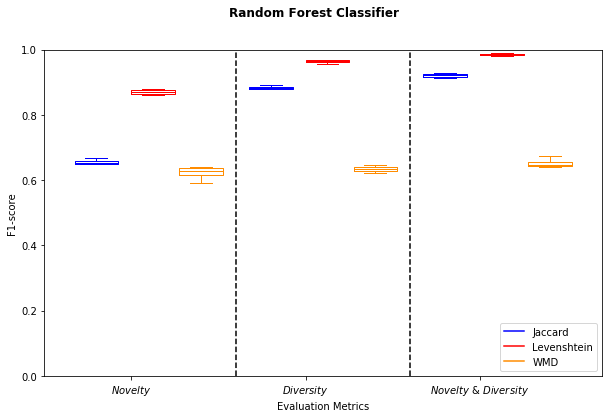

In [33]:
import matplotlib.pyplot as plt
import numpy as np

data_a = [jac_Novelty_RF, jac_Diversity_RF, jac_Novelty_Diversity_RF] # novelty
data_b = [lev_Novelty_RF, lev_Diversity_RF, lev_Novelty_Diversity_RF, []] # diversity
data_c = [wmd_Novelty_RF, wmd_Diversity_RF, wmd_Novelty_Diversity_RF, []] # novs and divs


ticks = ['$Novelty$', '$Diversity$', '$Novelty$ & $Diversity$']

def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

fig = plt.figure(figsize=(10,6))

bpl = plt.boxplot(data_a, positions=np.array(range(len(data_a)))*2.0-0.4, sym='', widths=0.5)
bpm = plt.boxplot(data_b, positions=np.array(range(len(data_b)))*2.0+0.25, sym='', widths=0.5)
bpr = plt.boxplot(data_c, positions=np.array(range(len(data_c)))*2.0+0.8, sym='', widths=0.5)
set_box_color(bpl, 'blue')
set_box_color(bpm, 'red')
set_box_color(bpr, 'darkorange')


# draw temporary red and blue lines and use them to create a legend
plt.plot([], c='blue', label='Jaccard')
plt.plot([], c='red', label='Levenshtein')
plt.plot([], c='darkorange', label='WMD')

plt.legend(loc='lower right')

xcoords = [1.2, 3.2]
colors = ['k','k']

for xc,c in zip(xcoords,colors):
    plt.axvline(x=xc, label='line at x = {}'.format(xc), c=c, linestyle='--')

plt.xticks(range(0, len(ticks) * 3, 2), ticks)
plt.xlim(-1, len(ticks)*1.8)
plt.ylim(0, 1)
plt.xlabel('Evaluation Metrics')
plt.ylabel('F1-score')
fig.suptitle('Random Forest Classifier', fontsize=12, fontweight='bold')
# plt.tight_layout()
# plt.savefig('boxcompare.png')